<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [371]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import numpy as np

In [280]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [281]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [282]:
# текст запроса
query_3_1 = f'''SELECT COUNT(*)
FROM VACANCIES;
'''


In [283]:
# результат запроса
df_vacancies  = pd.read_sql_query(query_3_1 , connection)
df_vacancies


C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\2838616981.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_vacancies  = pd.read_sql_query(query_3_1 , connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [284]:
# текст запроса
# Текст запроса 
query_3_2 = '''
    SELECT COUNT(*)
    FROM EMPLOYERS;
'''



In [285]:
# результат запроса
df_employers = pd.read_sql_query(query_3_2, connection)
df_employers

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\3337367508.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [286]:
# текст запроса
query_3_3= '''
    SELECT COUNT(*) 
    FROM AREAS;
'''


In [287]:
# результат запроса
df_regions = pd.read_sql_query(query_3_3, connection)
df_regions

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\1240663709.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_regions = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [288]:
# текст запроса
query_3_4 = '''
    SELECT COUNT(*)
    FROM INDUSTRIES;
'''

In [289]:
# результат запроса
df_industries = pd.read_sql_query(query_3_4, connection)
df_industries

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\1986887719.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_industries = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\828803864.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_industries = pd.read_sql_query(query_top_industries, connection)


C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\828803864.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


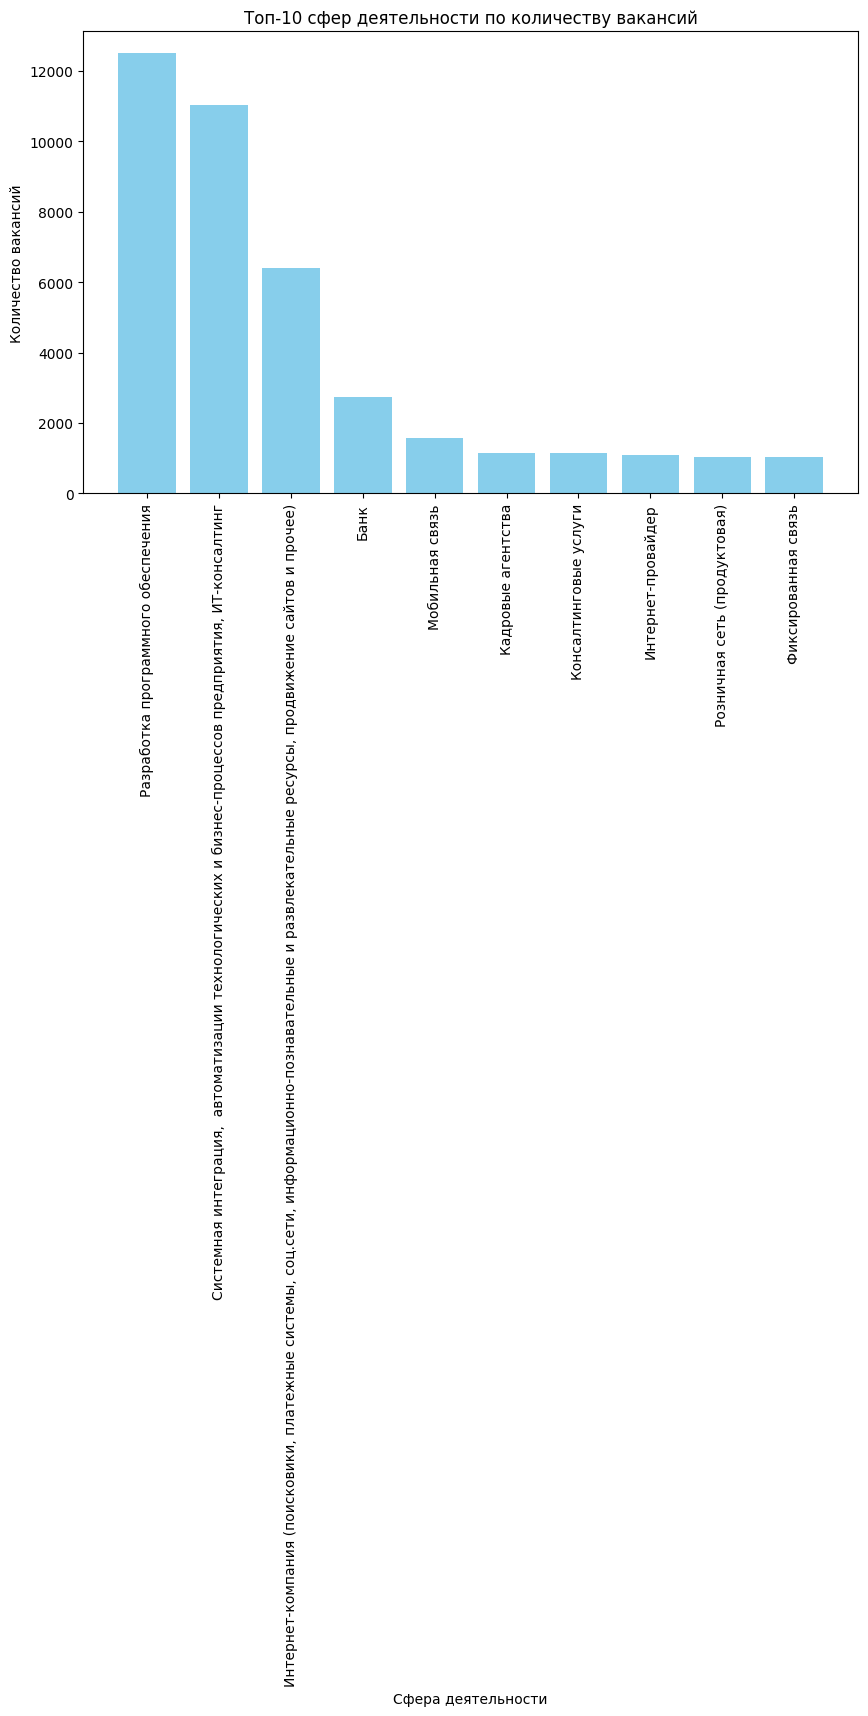

In [290]:
# SQL-запрос для топ-10 вакансий по сферам деятельности
query_top_industries = '''
    SELECT I.name AS industry_name, COUNT(*) AS total_vacancies
    FROM VACANCIES V
    JOIN EMPLOYERS_INDUSTRIES EI ON V.employer_id = EI.employer_id
    JOIN INDUSTRIES I ON EI.industry_id = I.id
    GROUP BY I.name
    ORDER BY total_vacancies DESC
    LIMIT 10;
'''

# Получение данных из базы данных в DataFrame
df_top_industries = pd.read_sql_query(query_top_industries, connection)




# Построение графика топ-10 сфер деятельности по количеству вакансий
plt.figure(figsize=(10, 6))
plt.bar(df_top_industries['industry_name'], df_top_industries['total_vacancies'], color='skyblue')
plt.xlabel('Сфера деятельности')
plt.ylabel('Количество вакансий')
plt.title('Топ-10 сфер деятельности по количеству вакансий')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Исходя из полученных данных предварительного анализа:

* Вакансии: В базе данных имеется 49,197 вакансий.
* Работодатели: Общее количество работодателей составляет 23,501.
* Регионы: Всего 1,362 региона.
* Сферы деятельности: В базе данных содержится информация о 294 сферах деятельности.

Из этих данных можно сделать несколько предварительных выводов:

Обширная база вакансий: Присутствие почти 50 тысяч вакансий может указывать на широкий спектр профессиональных областей, которые покрываются этой базой данных.
Разнообразие работодателей: Наличие более 23 тысяч работодателей говорит о том, что в базе данных представлены данные о вакансиях от различных компаний или работодателей.
Географическое разнообразие: 1,362 региона охватываются данными, что указывает на разнообразие местоположений вакансий.
Разнообразие сфер деятельности: Информация о 294 сферах деятельности показывает разнообразие отраслей, в которых предлагаются вакансии.
Эти выводы подразумевают, что база данных содержит обширную информацию о вакансиях, работодателях, их местоположениях и различных отраслях деятельности, что может быть полезным для анализа и предоставления рекомендаций клиентам агентства, ищущим позицию Data Scientist.


### Исходя из полученных значений топ-10 сфер деятельности и количества вакансий, можно сделать следующие дополнительные выводы:

Основные сферы с высоким спросом на вакансии принадлежат сфере IT. Количество вакансий в топ-10 сферах деятельности все таки различается, что говорит о разнообразии отраслей, в которых есть спрос на профессионалов. Это может предоставить агентству возможность подбора вакансий Data Scientist в различных сферах, в зависимости от потребностей клиентов.

Потенциальная направленность агентства: Зная, что сферы IT и технологий имеют высокий спрос на специалистов, агентство может уделить особое внимание этим отраслям при предоставлении рекомендаций клиентам, заинтересованным в позиции Data Scientist.

Эти данные дополняют предварительный анализ и позволяют лучше понять направленность спроса на вакансии в различных отраслях, что может быть важной информацией для клиентов, ищущих позицию Data Scientist.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [291]:
# текст запроса
query_vacancies_per_region = '''
    SELECT A.name AS region, COUNT(V.id) AS cnt_vacancies
    FROM VACANCIES V
    JOIN AREAS A ON V.area_id = A.id
    GROUP BY A.name
    ORDER BY cnt_vacancies DESC;
'''


In [292]:
# результат запроса
df_vacancies_per_region = pd.read_sql_query(query_vacancies_per_region, connection)
df_vacancies_per_region

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\3383484370.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_vacancies_per_region = pd.read_sql_query(query_vacancies_per_region, connection)


,region,cnt_vacancies
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [293]:
# текст запроса
query_vacancies_with_salary = '''
    SELECT COUNT(*) AS vacancies_with_salary
    FROM VACANCIES
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL;
'''

In [294]:
# результат запроса
vacancies_with_salary = pd.read_sql_query(query_vacancies_with_salary, connection)
vacancies_with_salary

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\1163228704.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_with_salary = pd.read_sql_query(query_vacancies_with_salary, connection)


,vacancies_with_salary
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [295]:
# текст запроса
query_avg_salary = '''
    SELECT ROUND(AVG(salary_from)) AS avg_salary_from, ROUND(AVG(salary_to)) AS avg_salary_to
    FROM VACANCIES
    WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL;
'''

In [296]:
# результат запроса
df_avg_salaries = pd.read_sql_query(query_avg_salary, connection)


avg_salary_from = df_avg_salaries['avg_salary_from'][0]
avg_salary_to = df_avg_salaries['avg_salary_to'][0]


print(f"Средняя нижняя граница зарплатной вилки: {avg_salary_from}")
print(f"Средняя верхняя граница зарплатной вилки: {avg_salary_to}")

Средняя нижняя граница зарплатной вилки: 71065.0
Средняя верхняя граница зарплатной вилки: 110537.0


C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\3523900789.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_salaries = pd.read_sql_query(query_avg_salary, connection)


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [297]:
# текст запроса
query_vacancies_by_schedule_employment = '''
    SELECT schedule, employment, COUNT(*) AS vacancies_count
    FROM VACANCIES
    GROUP BY schedule, employment
    ORDER BY vacancies_count DESC;
'''


In [298]:
# результат запроса
df_vacancies_by_schedule_employment = pd.read_sql_query(query_vacancies_by_schedule_employment, connection)
df_vacancies_by_schedule_employment

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\970716902.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_vacancies_by_schedule_employment = pd.read_sql_query(query_vacancies_by_schedule_employment, connection)


,schedule,employment,vacancies_count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [299]:
# текст запроса
query_experience_by_vacancies_count = '''
    SELECT experience, COUNT(*) AS vacancies_count
    FROM VACANCIES
    GROUP BY experience
    ORDER BY vacancies_count ASC;
'''

In [300]:
# результат запроса
df_experience_by_vacancies_count = pd.read_sql_query(query_experience_by_vacancies_count, connection)
df_experience_by_vacancies_count

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\346288179.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_experience_by_vacancies_count = pd.read_sql_query(query_experience_by_vacancies_count, connection)


,experience,vacancies_count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***


Исходя из данных анализа:

1. Локализация вакансий: Основные центры сосредоточения вакансий - Москва, Санкт-Петербург, Минск, Новосибирск и Алматы. Это соответствует общепринятой тенденции - в крупных городах сосредоточены ключевые деловые и научные центры, что привлекает больше вакансий.

2. Уровень указания зарплаты: Около 24 073 вакансий содержат указание хотя бы одной границы зарплатной вилки. Это дает соискателям лучшее представление о финансовых ожиданиях работодателей.

3. Зарплатные ожидания: Средние значения зарплатной вилки: нижняя граница - 71 065, верхняя граница - 110 537. Эти значения служат ориентиром для соискателей и помогают определить финансовые предпочтения.

4. Типы рабочего графика и трудоустройства: Наиболее распространенные комбинации:

    *  Полный день - Полная занятость (самая популярная)
    * Удаленная работа - Полная занятость (отражает востребованность удаленной работы, особенно в IT-сфере)
    * Гибкий график - Полная занятость
Это свидетельствует о предпочтениях работодателей в найме специалистов на полный рабочий день, но также показывает рост популярности удаленной работы и гибких графиков.

Опыт работы: Наиболее популярные уровни опыта работы:

* От 1 года до 3 лет (самый востребованный)
* От 3 до 6 лет
* Более 6 лет (наименее востребованный)
Это указывает на спрос на специалистов с средним опытом работы. Вакансий для начинающих и опытных специалистов меньше.

Исходя из анализа, можно предположить, что на момент составления базы данных рынок труда был активен с потребностью в специалистах разного уровня опыта. Удаленная работа и гибкие графики становятся более популярными, что отражает изменения в предпочтениях современных специалистов и работодателей. Эти данные могут помочь соискателям определить свои ожидания, а работодателям - корректировать предложения для привлечения кандидатов.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [301]:
# текст запроса
query_top_employers = '''
SELECT employers.name AS employer_name, COUNT(*) AS total_vacancies
FROM employers
JOIN vacancies ON employers.id = vacancies.employer_id
GROUP BY employer_name
ORDER BY total_vacancies DESC
LIMIT 5;
'''

In [302]:
# результат запроса
df_top_employers = pd.read_sql_query(query_top_employers, connection)
print(df_top_employers)

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\671747272.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_employers = pd.read_sql_query(query_top_employers, connection)


   employer_name  total_vacancies
0         Яндекс             1933
1     Ростелеком              491
2       Тинькофф              444
3           СБЕР              428
4  Газпром нефть              331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [303]:
# текст запроса
query_employers_vacancies_by_area = '''
    SELECT 
        a.name AS region_name,
        COUNT(DISTINCT e.id) AS employers_count
    FROM AREAS a
    LEFT JOIN EMPLOYERS e ON a.id = e.area
    LEFT JOIN VACANCIES v ON a.id = v.area_id
    WHERE v.id IS NULL
    GROUP BY a.name
    ORDER BY employers_count DESC
    LIMIT 1;
'''

In [304]:
df_employers_vacancies_by_area = pd.read_sql_query(query_employers_vacancies_by_area, connection)
print(df_employers_vacancies_by_area)

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\4166089072.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers_vacancies_by_area = pd.read_sql_query(query_employers_vacancies_by_area, connection)


  region_name  employers_count
0      Россия              410


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [305]:
# текст запроса
query_employers_regions = '''
    SELECT 
        e.name AS employer_name,
        COUNT(DISTINCT v.area_id) AS regions_count
    FROM EMPLOYERS e
    LEFT JOIN VACANCIES v ON e.id = v.employer_id
    GROUP BY e.name
    ORDER BY regions_count DESC;
'''

In [306]:
# результат запроса
df_employers_regions = pd.read_sql_query(query_employers_regions, connection)
print(df_employers_regions)

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\827379040.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers_regions = pd.read_sql_query(query_employers_regions, connection)


                employer_name  regions_count
0                      Яндекс            181
1                  Ростелеком            152
2                  Спецремонт            116
3      Поляков Денис Иванович             88
4                   ООО ЕФИН              71
...                       ...            ...
23170                  СДЕЛКА              0
23171            Alandr Group              0
23172                     СДК              0
23173      Lemon Land Lombard              0
23174                  Махина              0

[23175 rows x 2 columns]


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [307]:
# текст запроса
query_employers_without_industry = '''
    SELECT COUNT(*)
FROM public.employers e
WHERE NOT EXISTS (
    SELECT 1
    FROM public.employers_industries ei
    WHERE e.id = ei.employer_id
);
'''

In [308]:
# результат запроса
df_employers_without_industry = pd.read_sql_query(query_employers_without_industry, connection)
print(df_employers_without_industry)

   count
0   8419


C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\2152408471.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers_without_industry = pd.read_sql_query(query_employers_without_industry, connection)


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [309]:
# текст запроса
query_third_company = '''
    SELECT name
    FROM (
        SELECT name, ROW_NUMBER() OVER (ORDER BY name) AS company_rank
        FROM public.employers e
        JOIN public.employers_industries ei ON e.id = ei.employer_id
        GROUP BY e.id, e.name
        HAVING COUNT(ei.industry_id) = 4
    ) AS ranked_companies
    WHERE company_rank = 3;
'''

In [310]:
# результат запроса
with connection.cursor() as cursor:
    cursor.execute(query_third_company)
    third_company = cursor.fetchone()
    print("Название компании, находящейся на третьем месте в алфавитном списке с 4 сферами деятельности:", third_company[0] if third_company else "Ничего не найдено")

Название компании, находящейся на третьем месте в алфавитном списке с 4 сферами деятельности: 2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [311]:
# текст запроса
query_employers_with_industry = '''
    SELECT COUNT(DISTINCT employer_id) AS employers_count
    FROM public.employers_industries
    WHERE industry_id = (
        SELECT id
        FROM public.industries
        WHERE name = 'Разработка программного обеспечения'
    );
'''

In [312]:
# результат запроса
df_employers_with_industry = pd.read_sql_query(query_employers_with_industry, connection)
print(df_employers_with_industry)

   employers_count
0             3553


C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\905208234.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers_with_industry = pd.read_sql_query(query_employers_with_industry, connection)


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [313]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

h3 = soup.find('span', {'id': 'Список_городов-миллионеров'}).parent
table = h3.find_next_sibling('table')

cities = []
for row in table.find_all('tr')[1:]:
    city = row.find_all('td')[1].get_text(strip=True)
    cities.append(city)

print(cities)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Красноярск', 'Челябинск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [314]:
# текст запроса
cities_placeholder = ', '.join(['%s'] * len(cities))
query_yandex_vacancies = f'''
WITH yandex AS (
    SELECT id
    FROM public.employers
    WHERE name = 'Яндекс'
),
yandex_vacancies AS (
    SELECT area_id, COUNT(*) AS count
    FROM public.vacancies
    WHERE employer_id = (SELECT id FROM yandex)
    GROUP BY area_id
),
million_cities AS (
    SELECT id, name
    FROM public.areas
    WHERE name IN ({cities_placeholder})
)

SELECT mc.name AS city, yv.count AS vacancies_count
FROM million_cities mc
LEFT JOIN yandex_vacancies yv ON mc.id = yv.area_id
WHERE yv.count IS NOT NULL
ORDER BY yv.count
'''


In [315]:
# результат запроса
with connection.cursor() as cursor:
    cursor.execute(query_yandex_vacancies, tuple(cities))
    result = cursor.fetchall()

# Считаем общее количество вакансий и добавляем строку Total в результат
total_vacancies = sum(row[1] for row in result)
result.append(('Total', total_vacancies))

# Выводим результат
for row in result:
    print(row)

('Омск', 21)
('Челябинск', 22)
('Красноярск', 23)
('Волгоград', 24)
('Казань', 25)
('Ростов-на-Дону', 25)
('Пермь', 25)
('Уфа', 26)
('Самара', 26)
('Краснодар', 30)
('Воронеж', 32)
('Новосибирск', 35)
('Нижний Новгород', 36)
('Екатеринбург', 39)
('Санкт-Петербург', 42)
('Москва', 54)
('Total', 485)


***

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\3324961583.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_industries = pd.read_sql_query(query_top_industries, connection)
C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\3324961583.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_employers = pd.read_sql_query(query_top_employers, connection)


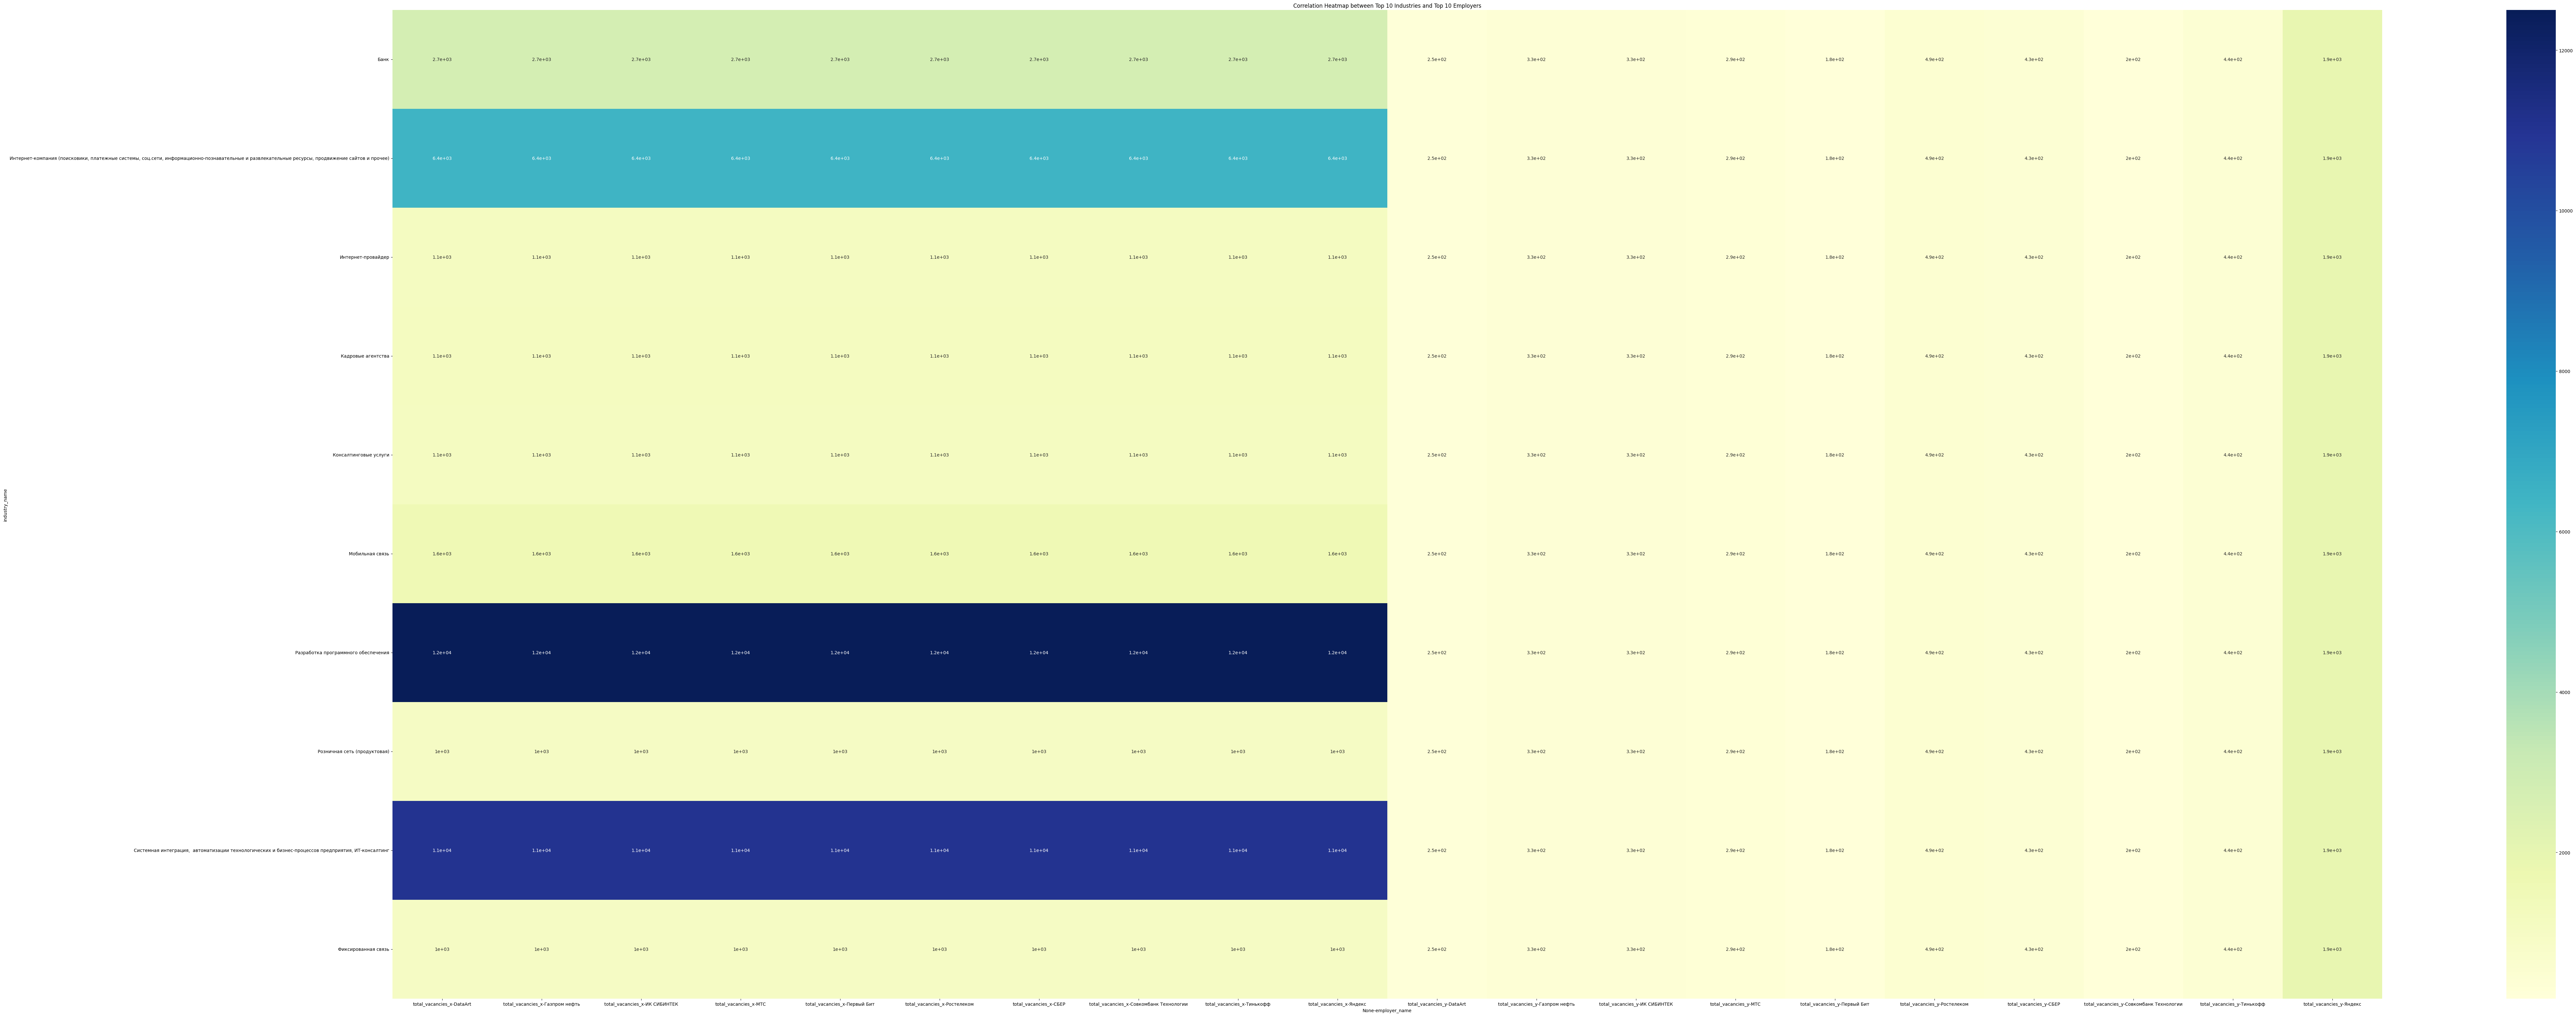

In [316]:
# выводы по анализу работодателей
# SQL-запрос для получения топ-10 сфер деятельности по количеству вакансий
query_top_industries = '''
    SELECT I.name AS industry_name, COUNT(*) AS total_vacancies
    FROM vacancies V
    JOIN employers_industries EI ON V.employer_id = EI.employer_id
    JOIN industries I ON EI.industry_id = I.id
    GROUP BY I.name
    ORDER BY total_vacancies DESC
    LIMIT 10;
'''

# SQL-запрос для получения топ-10 работодателей по количеству вакансий
query_top_employers = '''
    SELECT E.name AS employer_name, COUNT(*) AS total_vacancies
    FROM vacancies V
    JOIN employers E ON V.employer_id = E.id
    GROUP BY E.name
    ORDER BY total_vacancies DESC
    LIMIT 10;
'''

# Получение данных из базы данных в DataFrame
df_top_industries = pd.read_sql_query(query_top_industries, connection)
df_top_employers = pd.read_sql_query(query_top_employers, connection)

# Создание тепловой карты с помощью seaborn
data = pd.merge(df_top_industries, df_top_employers, how='cross')

pivot_table = data.pivot_table(index='industry_name', columns='employer_name', aggfunc='sum', fill_value=0)

plt.figure(figsize=(100, 40))
heatmap = sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
heatmap.set_title('Correlation Heatmap between Top 10 Industries and Top 10 Employers')
plt.show()

Из выполненных запросов мы можем сделать следующие выводы

1. Яндекс и Газпром нефть лидируют по количеству вакансий: В рамках анализа выяснили, что Яндекс и Газпром нефть находятся на первом и пятом местах соответственно по количеству опубликованных вакансий. Это говорит о значительной активности этих компаний на рынке труда.

2. Региональная активность компаний: Проведённый анализ показал количество работодателей и вакансий в каждом регионе. Отмечается отсутствие вакансий в некоторых регионах, преимущественно в России.

3. Количество регионов для работодателей: Для большинства работодателей наблюдается наличие вакансий в нескольких регионах, что может свидетельствовать о распределенности деятельности компаний по различным локациям.

4. Неопределенные сферы деятельности: Более 8000 работодателей не указали сферу своей деятельности, что может затруднить для кандидатов поиски подходящих вакансий и ограничить их выбор.

5. Компания 2ГИС и "Разработка программного обеспечения": Компания 2ГИС находится на третьем месте в алфавитном списке компаний, у которых указаны четыре сферы деятельности. Количество работодателей, указавших сферу "Разработка программного обеспечения", составляет 3553.

6. Регионы-миллионники для Яндекса: Для компании Яндекс выяснили регионы-миллионники, в которых представлены их вакансии, а также общее количество вакансий в этих регионах. Полученная выборка включает 17 строк, а итоговое общее количество вакансий для компании Яндекс составляет 485.

Также тепловая карта топ10 вакансий и топ10 работодателей показали, что топ10 работодателй выставляют вакансии в сфере IT.  Эти данные могут использоваться для выработки рекомендаций и стратегий как для соискателей, так и для работодателей. Например, увеличение присутствия в регионах с низким количеством вакансий или уточнение информации о сфере деятельности для улучшения поиска вакансий.







# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [317]:
# текст запроса
query_data_related_vacancies = f"""
SELECT COUNT(*) as count
FROM public.vacancies
WHERE LOWER(name) LIKE '%data%' OR LOWER(name) LIKE '%данн%';
"""


In [318]:
# результат запроса
df_data_related_vacancies = pd.read_sql_query(query_data_related_vacancies, connection)
display("Количество вакансий, относящихся к данным:", df_data_related_vacancies["count"][0])

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\3232817832.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_data_related_vacancies = pd.read_sql_query(query_data_related_vacancies, connection)


'Количество вакансий, относящихся к данным:'

1771

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [319]:
# текст запроса
query_total_junior_data_scientist_vacancies = f"""
SELECT COUNT(*)
FROM vacancies
WHERE 
    (LOWER(name) LIKE '%data scientist%' OR
    LOWER(name) LIKE '%data science%' OR
    LOWER(name) LIKE '%исследователь данных%' OR
    LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%' OR
    LOWER(name) LIKE '%machine learning%' OR
    LOWER(name) LIKE '%машинн%обучен%' OR
    LOWER(name) = 'ml')
    AND (
    LOWER(name) LIKE '%junior%' OR
    LOWER(experience) = 'нет опыта' OR
    LOWER(employment) = 'стажировка'
    );
"""




In [320]:
# результат запроса
df_total_junior_data_scientist_vacancies = pd.read_sql_query(query_total_junior_data_scientist_vacancies, connection)
df_total_junior_data_scientist_vacancies

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\2985453943.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_total_junior_data_scientist_vacancies = pd.read_sql_query(query_total_junior_data_scientist_vacancies, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [321]:
# текст запроса
query_ds_sql_postgres_vacancies = '''
    SELECT COUNT(*)
    FROM vacancies
    WHERE (
        LOWER(key_skills) LIKE '%sql%' OR
        LOWER(key_skills) LIKE '%postgres%'
    ) AND (
        (LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        LOWER(name) LIKE '%machine learning%' OR
        name LIKE '%ML%' AND name NOT LIKE '%HTML%' OR
        LOWER(name) LIKE '%машинн%обучен%')
    );
'''

In [322]:
# результат запроса
df_ds_sql_postgres_vacancies = pd.read_sql_query(query_ds_sql_postgres_vacancies, connection)
print("Количество вакансий для Data Scientist с ключевыми навыками SQL или PostgreSQL:", df_ds_sql_postgres_vacancies['count'][0])

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\2258618373.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ds_sql_postgres_vacancies = pd.read_sql_query(query_ds_sql_postgres_vacancies, connection)


Количество вакансий для Data Scientist с ключевыми навыками SQL или PostgreSQL: 201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [323]:
# текст запроса
query_ds_python_vacancies = '''
    SELECT COUNT(*)
    FROM vacancies
    WHERE (
        LOWER(key_skills) LIKE '%python%'
    ) AND (
        (LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        LOWER(name) LIKE '%machine learning%' OR
        name LIKE '%ML%' AND name NOT LIKE '%HTML%' OR
        LOWER(name) LIKE '%машинн%обучен%')
    );
'''


In [324]:
# результат запроса
# Получение данных из базы данных в DataFrame
df_ds_python_vacancies = pd.read_sql_query(query_ds_python_vacancies, connection)

# Вывод результата
print("Количество вакансий для Data Scientist с ключевыми навыками Python:", df_ds_python_vacancies['count'][0])

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\304308804.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ds_python_vacancies = pd.read_sql_query(query_ds_python_vacancies, connection)


Количество вакансий для Data Scientist с ключевыми навыками Python: 351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [325]:
# текст запроса
query_avg_skills_ds = '''
    SELECT id, (LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), ''))) + 1 AS num_skills
    FROM vacancies
    WHERE (
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        LOWER(name) LIKE '%machine learning%' OR
        name LIKE '%ML%' AND name NOT LIKE '%HTML%' OR
        LOWER(name) LIKE '%машинн%обучен%'
    );
'''


In [326]:
# результат запроса
df_avg_skills_ds = pd.read_sql_query(query_avg_skills_ds, connection)

print("Среднее количество ключевых навыков в вакансиях для Data Scientist:", round(df_avg_skills_ds.mean(), 2))

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\3094559253.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_skills_ds = pd.read_sql_query(query_avg_skills_ds, connection)


Среднее количество ключевых навыков в вакансиях для Data Scientist: id            55270905.71
num_skills           6.41
dtype: float64


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [405]:
# текст запроса
query_avg_salary_by_experience = '''
    SELECT experience, ROUND(AVG(salary)) AS avg_salary
FROM (
    SELECT id, experience,
           (COALESCE(salary_from, 0) + COALESCE(salary_to, 0)) / 
           (CASE WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL THEN 2 ELSE 1 END) AS salary
    FROM vacancies
    WHERE (
        LOWER(name) LIKE '%data scientist%'
        OR LOWER(name) LIKE '%data science%'
        OR LOWER(name) LIKE '%исследователь данных%'
        OR LOWER(name) LIKE '%machine learning%'
        OR name LIKE '%ML%' AND name NOT LIKE '%HTML%'
        OR LOWER(name) LIKE '%машинн%обучен%')
        AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
) AS vacancy_salary
GROUP BY experience;
'''

In [406]:
# результат запроса
df_avg_salary_by_experience = pd.read_sql_query(query_avg_salary_by_experience, connection)

# Вывод результата

print(round(df_avg_salary_by_experience, 0))

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\3787615321.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_salary_by_experience = pd.read_sql_query(query_avg_salary_by_experience, connection)


           experience  avg_salary
0           Нет опыта     74643.0
1  От 1 года до 3 лет    139675.0
2       От 3 до 6 лет    243115.0


***

In [407]:
query_avg_salary_by_experience_non_ds = '''
SELECT experience, ROUND(AVG(salary)) AS avg_salary
FROM (
    SELECT id, experience,
           (COALESCE(salary_from, 0) + COALESCE(salary_to, 0)) / 
           (CASE WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL THEN 2 ELSE 1 END) AS salary
    FROM vacancies
    WHERE (
        LOWER(name) NOT LIKE '%data scientist%'
        AND LOWER(name) NOT LIKE '%data science%'
        AND LOWER(name) NOT LIKE '%исследователь данных%'
        AND LOWER(name) NOT LIKE '%machine learning%'
        AND (LOWER(name) NOT LIKE '%ml%' OR LOWER(name) LIKE '%html%')
        AND LOWER(name) NOT LIKE '%машинн%обучен%')
        AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
) AS vacancy_salary
GROUP BY experience;
'''

In [408]:
# результат запроса
df_avg_salary_by_experience_nonDS = pd.read_sql_query(query_avg_salary_by_experience_non_ds, connection)

# Вывод результата

print(round(df_avg_salary_by_experience_nonDS, 0))

           experience  avg_salary
0         Более 6 лет    166317.0
1           Нет опыта     40425.0
2  От 1 года до 3 лет     76371.0
3       От 3 до 6 лет    132310.0


C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\1695139871.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_salary_by_experience_nonDS = pd.read_sql_query(query_avg_salary_by_experience_non_ds, connection)


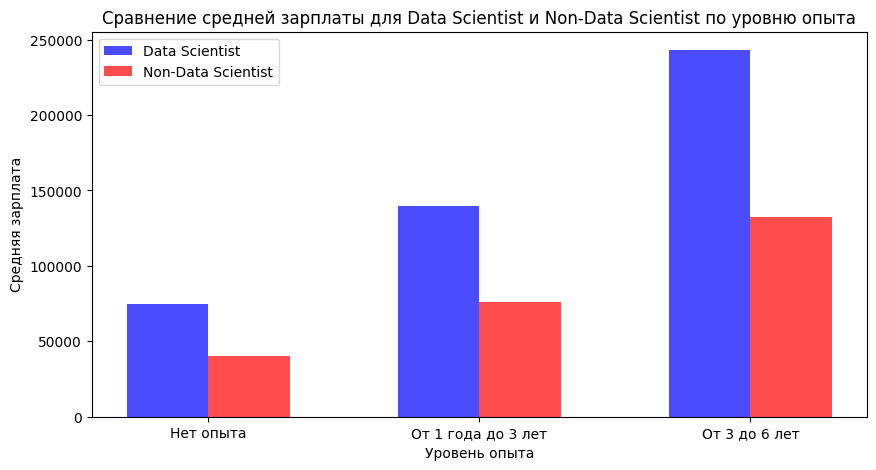

In [409]:
# Зарплаты для DS и не-DS вакансий
ds_salaries = [74643, 139675, 243115]
non_ds_salaries = [40425, 76371, 132310]

# Категории опыта
experience_levels = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет']

# Создаем индексы для каждого уровня опыта
ind = np.arange(len(experience_levels))

# Построение гистограммы
plt.figure(figsize=(10, 5))

bar_width = 0.3

plt.bar(ind, ds_salaries, width=bar_width, label='Data Scientist', alpha=0.7, color='b')
plt.bar(ind + bar_width, non_ds_salaries, width=bar_width, label='Non-Data Scientist', alpha=0.7, color='r')

# Настройка внешнего вида графика
plt.xlabel('Уровень опыта')
plt.ylabel('Средняя зарплата')
plt.title('Сравнение средней зарплаты для Data Scientist и Non-Data Scientist по уровню опыта')
plt.xticks(ind + bar_width / 2, experience_levels)
plt.legend()

# Отображение графика
plt.show()

In [447]:
data_scientist_vacancies = '''
SELECT COUNT(*) as count
FROM public.vacancies
WHERE (
        LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        LOWER(name) LIKE '%machine learning%' OR
        (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%') OR
        LOWER(name) LIKE '%машинн%обучен%'
    );
'''
# результат запроса

df = pd.read_sql_query(data_scientist_vacancies, connection)
display("Количество вакансий для Data Scientist:", df["count"][0])

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\1904899965.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(data_scientist_vacancies, connection)


'Количество вакансий для Data Scientist:'

536

In [492]:
# выводы по предметному анализу
query_top_skills = '''
SELECT skill, COUNT(*) as count
FROM (
    SELECT UNNEST(STRING_TO_ARRAY(LOWER(REGEXP_REPLACE(key_skills, '\\t+', '\t')), '\t')) AS skill
    FROM vacancies
    WHERE LOWER(name) LIKE '%data scientist%' OR
        LOWER(name) LIKE '%data science%' OR
        LOWER(name) LIKE '%исследователь данных%' OR
        LOWER(name) LIKE '%machine learning%' OR
        name LIKE '%ML%' AND name NOT LIKE '%HTML%' OR
        LOWER(name) LIKE '%машинн%обучен%'
) AS skills_expanded
GROUP BY skill
ORDER BY count DESC
LIMIT 10;
'''

C:\Users\mazur\AppData\Local\Temp\ipykernel_20948\2420041906.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_skills = pd.read_sql_query(query_top_skills, connection)


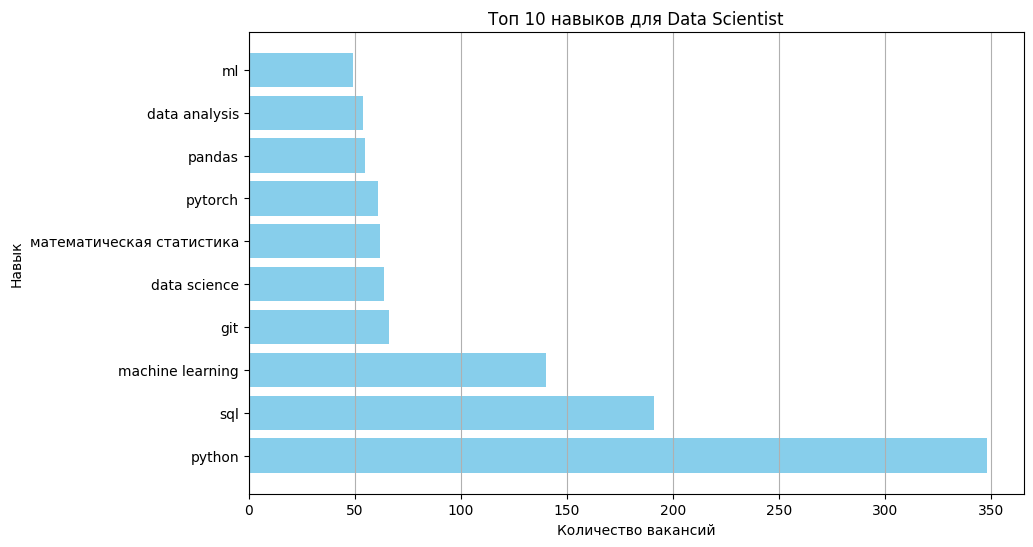

In [496]:
# Топ-10 навыков, требуемых для Data Science специалистов

df_top_skills = pd.read_sql_query(query_top_skills, connection)
# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(df_top_skills['skill'], df_top_skills['count'], color='skyblue')
plt.xlabel('Количество вакансий')
plt.ylabel('Навык')
plt.title('Топ 10 навыков для Data Scientist')
plt.grid(axis='x')
plt.show()


1. Средняя зарплата по опыту:
Средняя зарплата Data Scientist с опытом от 3 до 6 лет составляет 243,115 рублей. Это выше, чем у специалистов с опытом менее 3 лет (139,675 рублей) и заметно превышает среднюю зарплату тех, у кого опыт более 6 лет (166,317 рублей). Это может быть обусловлено ростом востребованности и ценности опытных специалистов в данной области.

2. Топ-10 ключевых навыков:
Python, SQL и Machine Learning являются наиболее востребованными навыками для Data Scientist. Это соответствует общей тенденции в индустрии данных, где Python является основным языком программирования (351 вакансия), SQL - важным инструментом для работы с базами данных (201 вакансия), а Machine Learning - ключевой областью экспертизы.

3. Сравнительно невысокая доля вакансий для Data Scientist (536 из 49197) может быть обусловлена тем, что область Data Science является специфической, требующей высокой квалификации и опыта. Некоторые компании могут предпочитать более общие или традиционные профессии, что снижает общий объем вакансий для Data Scientist в базе данных.

4. Существует 51 вакансия, которая может быть интересна начинающему дата-сайентисту. Это подтверждает наличие возможностей для стартапа карьеры в данной области, хотя возможно, требуется дополнительное внимание к соответствующим требованиям и подготовке.

5. Существенное количество вакансий, связанных с данными (1771 из 49197),показывает пока что небольщой спрос на специалистов, способных работать с обработкой и анализом данных. Однако расширение области Data Science предоставляет множество возможностей для трудоустройства и показывает потенциал и будущую актуальность в текущем рынке труда.

Data Science - это область с высоким уровнем заработных плат, особенно для специалистов с опытом от 3 до 6 лет. Python, SQL и Machine Learning остаются основными инструментами работы. Необходимость владения инструментами управления проектами и командной работы растет с увеличением опыта. Основные математические навыки более актуальны на начальных и средних уровнях, в то время как на более высоких уровнях опыта становятся важными технические и архитектурные навыки. Общий спрос на Data Scientist высок, что подчеркивает перспективность данной области для специалистов и компаний.

# Общий вывод по проекту

В результате проведенного анализа вакансий в области Data Science мы выявили следующие важные тенденции:

1. Разнообразие ключевых навыков: Навыки Python и машинного обучения остаются основными.

2. Высокие зарплаты: Заработные платы Data Scientist'ов превышают средние показатели в других областях. Это объясняется специфичностью профессии, высоким порогом входа и требуемыми специализированными навыками.

3. Направления для исследований: В дальнейших исследованиях можно обратить внимание на влияние размера компании, отрасли, а также географических и социокультурных особенностей на зарплаты и требования к навыкам.

4. Тенденции в области Data Science: Анализ тенденций позволит предсказать востребованные навыки в будущем и адаптировать образовательные программы к потребностям рынка.

Развитие карьеры с учетом технологических изменений: Изучение влияния искусственного интеллекта и автоматизации на сферу Data Science поможет спрогнозировать изменения в характере работы и открыть новые перспективы для специалистов.

В целом, исследование позволяет лучше понять динамику рынка Data Science, выявить тренды и подготовиться к будущим вызовам в этой динамичной области.





